<a href="https://colab.research.google.com/github/prasannarangam21/COVID-19-Radiography/blob/master/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resources used
- [Building powerful image classification models using very little data by Francois Chollet (Author of Keras)](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
- [Image Classification | Tensorflow](https://www.tensorflow.org/tutorials/images/classification)
- [Machine Learning Mastery - VGG16](https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/)
- [VGG 16 Explained](https://qr.ae/pNCJDU)

In [1]:
!nvidia-smi

Thu Sep 10 19:42:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
import cv2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from pandas import plotting
from tqdm import tqdm_notebook

# for visualizations
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import tensorflow as tf
print("Using Tensorflow version: {}".format(tf.__version__))

Using Tensorflow version: 2.3.0


# Loading data

In [4]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-US;q=0.9,en-GB;q=0.8,en;q=0.7" --header="Referer: https://www.kaggle.com/" --header="Cookie: _ga=GA1.3.1544602667.1598896344" --header="Connection: keep-alive" "https://storage.googleapis.com/kaggle-data-sets/576013%2F1042828%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1599935349&Signature=D66Fgi3oJ4WLI5Z1%2FJOnIDPllNCbrMesp9lN%2Bfrdu4puxjhyoTSLhKbpqXbWnwNHR3DrTD5jogdEBhYlur4LTl9EeqGzzX2xM%2FXDTq5I4h0EdUfwDG9AEQ2thtZgONGiV2g3PUCdMXp19aD4i0tRt2ITK8qULU2Q6WyqDn%2BSrL5iRM8g2KgfWbtJ%2BooXCxECAy9DZzFSE%2Fts8XnA%2B1mCuNdd96%2Fnztd7Iy4sMnnZWeqb8MkOAhtaIzBe5%2BhMeVkyW6WpnDPuWQhwODttQ8g5KK0aKgNhrX1rPbk7Tpcu3%2FRVl48%2Bf8tnrl8TY52FowqQXMUgYCghMCiID26pPfOQWQ%3D%3D" -c -O '576013_1042828_bundle_archive.zip'

--2020-09-10 19:42:46--  https://storage.googleapis.com/kaggle-data-sets/576013%2F1042828%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1599935349&Signature=D66Fgi3oJ4WLI5Z1%2FJOnIDPllNCbrMesp9lN%2Bfrdu4puxjhyoTSLhKbpqXbWnwNHR3DrTD5jogdEBhYlur4LTl9EeqGzzX2xM%2FXDTq5I4h0EdUfwDG9AEQ2thtZgONGiV2g3PUCdMXp19aD4i0tRt2ITK8qULU2Q6WyqDn%2BSrL5iRM8g2KgfWbtJ%2BooXCxECAy9DZzFSE%2Fts8XnA%2B1mCuNdd96%2Fnztd7Iy4sMnnZWeqb8MkOAhtaIzBe5%2BhMeVkyW6WpnDPuWQhwODttQ8g5KK0aKgNhrX1rPbk7Tpcu3%2FRVl48%2Bf8tnrl8TY52FowqQXMUgYCghMCiID26pPfOQWQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1233525951 (1.1G) [application/zip]
Saving to: ‘576013_1042828_bundle_archive.zip’

576013_1042828_bund 100%[===================>]   1.15G  29.1MB/s    in

In [5]:
!mkdir -p covid
!unzip /content/576013_1042828_bundle_archive.zip -d covid 

Archive:  /content/576013_1042828_bundle_archive.zip
  inflating: covid/COVID-19 Radiography Database/COVID-19.metadata.xlsx  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (1).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (10).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (100).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (101).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (102).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (103).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (104).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (105).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (106).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (107).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (108).png  
  infla

In [6]:
%cd covid
!ls

/content/covid
'COVID-19 Radiography Database'


In [7]:
imagePaths = []
for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))

In [8]:
# Verifying length
len(imagePaths) == 2905

True

In [9]:
X = []
y = []
resize = 224

for image_path in tqdm_notebook(imagePaths):
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) / 255

    X.append(image)
    y.append(label)

X = np.array(X)
y = np.array(y)

# Analysis

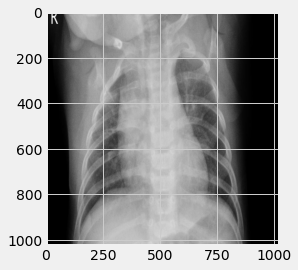

In [10]:
image = cv2.imread(imagePaths[0])
plt.imshow(image);

In [11]:
print(image.shape)

(1024, 1024, 3)


In [15]:
df['Labels'].value_counts()

Viral Pneumonia    1345
NORMAL             1341
COVID-19            219
Name: Labels, dtype: int64

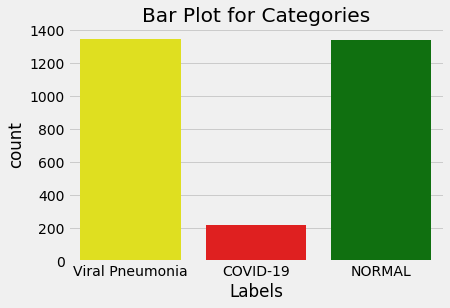

In [14]:
df = pd.DataFrame(y, columns=['Labels'])
sns.countplot(df['Labels'], \
              palette={'Viral Pneumonia':'yellow','NORMAL':'green','COVID-19':'red'})\
              .set_title('Bar Plot for Categories');

In [16]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [17]:
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(y)
y_encoded = np_utils.to_categorical(encoded_labels)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_cvtest, y_train, y_cvtest = train_test_split(X, y_encoded, test_size=0.40, stratify=y_encoded, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_cvtest, y_cvtest, test_size=0.50, stratify=y_cvtest, random_state=42)

print("{} \tRows and {} \tColumns in X_train".format(X_train.shape[0],X_train.shape[1]))
print("{} \tRows and {} \tColumns in X_test".format(X_test.shape[0],X_test.shape[1]))
print("{} \tRows and {} \tColumns in X_cv".format(X_cv.shape[0],X_cv.shape[1]))

print("{} \tRows and {} \tColumns in y_train".format(y_train.shape[0],y_train.shape[1]))
print("{} \tRows and {} \tColumns in y_test".format(y_test.shape[0],y_test.shape[1]))
print("{} \tRows and {} \tColumns in y_cv".format(X_test.shape[0],y_cv.shape[1]))

1743 	Rows and 224 	Columns in X_train
581 	Rows and 224 	Columns in X_test
581 	Rows and 224 	Columns in X_cv
1743 	Rows and 3 	Columns in y_train
581 	Rows and 3 	Columns in y_test
581 	Rows and 3 	Columns in y_cv


In [19]:
del X
del y_encoded
del encoded_labels

# Modelling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

from keras.utils import np_utils

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, InputLayer

In [21]:
BATCH_SIZE = 64
TRAIN_LENGTH = len(X_train)
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
IMG_SIZE = 224
LR = 0.0001
EPOCHS = 20

In [22]:
datagen = ImageDataGenerator(
        rotation_range=10,
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [39]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = cv2.imread(imagePaths[0])
x = img_to_array(img)  # this is a Numpy array with shape (3, 1024, 1024)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 1024, 1024)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='/content/temp', save_prefix='ct', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

FileNotFoundError: ignored

In [28]:
def my_model():
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='sigmoid'))

    return model

In [29]:
def VGG16_model():
    base = VGG16(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
    
    output = base.layers[-1].output
    output = Flatten()(output)
    
    model = Model(base.input, outputs=output)
    
    for layer in model.layers:
        layer.trainable = False
    
    return model

In [30]:
model = Sequential()
model.add(VGG16_model())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.summary()

58892288/58889256 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 25088)             14714688  
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               12845568  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 27,593,283
Trainable params: 12,878,595
Non

In [31]:
optimizer = Adam(lr = LR, decay = LR/EPOCHS)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
                                    steps_per_epoch=STEPS_PER_EPOCH,
                                    validation_data=(X_cv, y_cv),
                                    validation_steps=TRAIN_LENGTH//BATCH_SIZE,
                                    epochs=EPOCHS,
                                    verbose=1)

Epoch 1/20
27/27 [==============================] - 18s 656ms/step - loss: 0.9440 - accuracy: 0.4759 - val_loss: 0.9025 - val_accuracy: 0.4613
Epoch 2/20
27/27 [==============================] - 17s 618ms/step - loss: 0.9142 - accuracy: 0.4592 - val_loss: 0.9099 - val_accuracy: 0.4613
Epoch 3/20
27/27 [==============================] - 17s 618ms/step - loss: 0.9214 - accuracy: 0.4622 - val_loss: 0.9093 - val_accuracy: 0.4613
Epoch 4/20
27/27 [==============================] - 17s 620ms/step - loss: 0.9197 - accuracy: 0.4663 - val_loss: 0.9080 - val_accuracy: 0.4613
Epoch 5/20
27/27 [==============================] - 17s 620ms/step - loss: 0.9108 - accuracy: 0.4640 - val_loss: 0.9144 - val_accuracy: 0.4596
Epoch 6/20
27/27 [==============================] - 17s 621ms/step - loss: 0.9198 - accuracy: 0.4574 - val_loss: 0.9147 - val_accuracy: 0.4630
Epoch 7/20
27/27 [==============================] - 17s 624ms/step - loss: 0.9119 - accuracy: 0.4687 - val_loss: 0.9230 - val_accuracy: 0.4561

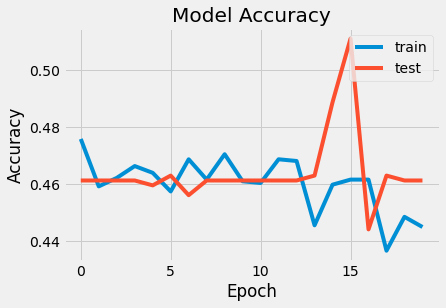

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

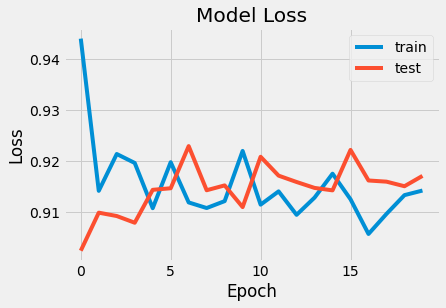

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()